### Importando Bibliotecas

In [42]:
# Processamento de dados
import pandas as pd
import csv
import cv2
import numpy as np

# Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Webscraping
from bs4 import BeautifulSoup
import requests
from selenium import webdriver
from urllib.parse import urljoin

# Outros
import threading
import easyocr
import re
import datetime

import warnings
warnings.filterwarnings('ignore')

### Salvando todos os links em arquivo txt

In [2]:
# Acessa o site de docentes do DC e salva todos os links da página em um arquivo txt
url = 'https://site.dc.ufscar.br/docentes'

# Configurar o webdriver do Selenium
driver = webdriver.Chrome()  # Certifique-se de ter o ChromeDriver instalado e no PATH

# Fazer uma solicitação HTTP para a URL usando o Selenium
driver.get(url)

# Obter o conteúdo da página após o carregamento dinâmico
page_content = driver.page_source

# Usar BeautifulSoup para analisar o HTML
soup = BeautifulSoup(page_content, 'html.parser')

# Encontrar todos os links na página
links = [a['href'] for a in soup.find_all('a', href=True)]

# Escrever os links em um arquivo txt
with open('links.txt', 'w') as f:
    for link in links:
        f.write("%s\n" % link)

# Fechar o webdriver do Selenium
driver.quit()


### Filtrando links

In [3]:
# abrir o arquivo links.txt
with open('links.txt', 'r') as f:
    links = f.readlines()

# Filtrar os links
docentes_links = []

# se o link contém 'docente' e não contém 'docentes', adicionar à lista docentes_links
for link in links:
    if 'docente' in link and 'docentes' not in link:
        docentes_links.append(link)

# escrever os links filtrados em um arquivo txt
with open('docentes_links.txt', 'w') as f:
    for link in docentes_links:
        f.write("%s" % link)


print(f'Os links foram salvos no arquivo "docentes_links.txt".')


Os links foram salvos no arquivo "docentes_links.txt".


### Acesso a cada link para pegar informações

In [4]:
# Configurar o webdriver do Selenium
driver = webdriver.Chrome()  # Certifique-se de ter o ChromeDriver instalado e no PATH

# abrir o arquivo docentes_links.txt
with open('docentes_links.txt', 'r') as txt_file:
    docentes_links = [row.strip() for row in txt_file]

url = 'https://site.dc.ufscar.br'

nomesEmails = []

headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}

# Escrever os dados dos docentes em um arquivo CSV
with open('docentes.csv', 'w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)
    csv_writer.writerow(['Nome', 'Telefone', 'Lattes', 'Email'])  # Escrever o cabeçalho

    for link in docentes_links:
        # Fazer uma solicitação HTTP para a URL usando o Selenium
        driver.get(url + link)

        # Obter o conteúdo da página após o carregamento dinâmico
        page_content = driver.page_source

        # Usar BeautifulSoup para analisar o HTML
        soup = BeautifulSoup(page_content, 'html.parser')

        # obter o nome do docente (o nome está dentro de uma div com id "docente-conteudo" e dentro de uma tag h3)
        nome = soup.find('div', id='docente-conteudo').find('h3').text

        # obter o telefone do docente (o telefone está dentro de uma div com id "docente-conteudo" e dentro da quarta tag p dentro da div)
        telefone = soup.find('div', id='docente-conteudo').find_all('p')[3].text

        # obter o lattes do docente (o lattes está dentro de uma div com id "docente-conteudo" e dentro de uma tag a)
        lattes = soup.find('div', id='docente-conteudo').find('a', href=re.compile(r'lattes')).get('href')

        # obter o email do docente (o email está dentro de uma div com id "docente-conteudo", dentro da terceira tag p e é uma imagem)
        email = soup.find('div', id='docente-conteudo').find_all('p')[2].find('img').get('src')

        nomesEmails.append(email)

        # Escrever os dados do docente no arquivo CSV
        csv_writer.writerow([nome, telefone, lattes, ''])

# Fechar o webdriver do Selenium
driver.quit()

print(f'Os dados dos docentes foram salvos no arquivo "docentes.csv".')

Os dados dos docentes foram salvos no arquivo "docentes.csv".


### Limpando CSV

In [5]:
# ler o arquivo docentes.csv
docentes = pd.read_csv('docentes.csv')

# substituir o texto "Telefone: " por "" (vazio)
docentes['Telefone'] = docentes['Telefone'].str.replace('Telefone: ', '')

# salvar o arquivo docentes.csv
docentes.to_csv('docentes.csv', index=False)

print(f'Os dados dos docentes foram salvos no arquivo "docentes.csv".')

Os dados dos docentes foram salvos no arquivo "docentes.csv".


### Baixando imagens

In [6]:
# baixa imagens de forma paralela utilizando threads
def baixar_imagem(url):
    resposta = requests.get(url, headers=headers)
    nome = url.split('/')[-1]
    destino = '/home/luis/Documentos/GitHub/Informacoes-Professores/emails/' + nome
    with open(destino, 'wb') as f:
        f.write(resposta.content)

linksEmails = []

for link in nomesEmails:
    linksEmails.append(urljoin(url, link))

threads = []
for url in linksEmails:
    thread = threading.Thread(target=baixar_imagem, args=(url,))
    threads.append(thread)
    thread.start()

for thread in threads:
    thread.join()

### Limpando nomes emails

In [7]:
# no array nomesEmails, remova a string /emails/ e a extensão .png de cada elemento
nomesEmails = [re.sub(r'\/emails\/|\.png', '', nomeEmail) for nomeEmail in nomesEmails]

print(nomesEmails)

['alanvalejo', 'alexandre.levada', 'andrebackes', 'andreendo', 'auri', 'comin', 'daniel.lucredio', 'delano', 'kato', 'ednaldo', 'emerson', 'fcferrari', 'fredy', 'helenacaseli', 'helio', 'heloisa', 'hermes', 'jander', 'joice', 'vivaldini', 'luciano', 'marcela', 'marcio', 'marilde.santos', 'mauricio', 'murillo', 'naldi', 'felice', 'orides', 'matias', 'pedrobugatti', 'priscilasaito', 'renato', 'cerri', 'rferrari', 'menotti', 'rrc', 'ferrari', 'rsinoue', 'sandra', 'zorzo', 'valtervcamargo', 'vania', 'desouza']


### Utilizando ML para verificar o nome dos emails nas imagens

In [8]:
# pegue todas imagens da pasta emails, converta para escala de cinza, obtenha o texto da imagem e armazene na coluna Email do arquivo docentes.csv
# ler o arquivo docentes.csv
docentes = pd.read_csv('docentes.csv')

# criar uma lista com os nomes dos arquivos
nomes = []

for nome in nomesEmails:
    nomes.append(nome + '.png')

# criar uma lista com os emails dos arquivos
emails = []

for nome in nomes:
    reader = easyocr.Reader(['en'])

    # Carregar a imagem
    imagem = cv2.imread('/home/luis/Documentos/GitHub/Informacoes-Professores/emails/' + nome)

    # Converter para escala de cinza
    gray = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

    # Obter o texto da imagem
    result = reader.readtext(gray)

    for detection in result:
        texto = detection[1]

    emails.append(texto)

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster wi

### Formatando emails

Como o modelo de Machine Learning não é exatamente preciso, ele pode cometer erros. Então, já que nós já temos os nomes dos emails (parte antes do @) por conta do 'src' das imagens, basta verificar se a quantidade de caracteres após o @ será mais que 9 (len('ufscar.br') == 9). Isso porque o modelo pode trocar caracteres, mas é extremamente difícil ele omitir caracteres. Se a quantidade for maior que 9, significa que após o @ será dc.ufscar.br, senão, será ufscar.br

In [9]:
# criar uma lista com os emails da UFSCar
ufscar = []

# se o email tiver mais de 9 caracteres após o @, o email é da UFSCar, senão é do DC
for email in emails:
    if len(email[email.find('@') + 1:]) > 9:
        ufscar.append(False)
    else:
        ufscar.append(True)

# criar uma lista com os emails completos
for i in range(len(emails)):
    if ufscar[i]:
        ufscar[i] = nomesEmails[i] + '@ufscar.br'
    else:
        ufscar[i] = nomesEmails[i] + '@dc.ufscar.br'

# substituir a coluna Email do arquivo docentes.csv pela lista ufscar
docentes['Email'] = ufscar

# salvar o arquivo docentes.csv
docentes.to_csv('docentes.csv', index=False)

print(f'Os emails dos docentes foram salvos no arquivo "docentes.csv".')


Os emails dos docentes foram salvos no arquivo "docentes.csv".


### Consultando no Portal da Transparência o salário dos docentes

In [10]:
# ler o arquivo docentes.csv
docentes = pd.read_csv('docentes.csv')

# criar colunas para armazenar as remunerações bruta e líquida
docentes['RemuneracaoBasicaBruta'] = ''
docentes['RemuneracaoBasicaLiquida'] = ''

# criar uma lista com os nomes dos arquivos
remuneracaoBruta = []
remuneracaoLiquida = []

# para conseguir acessar a API, é necessário ter uma chave de acesso
# para obter a chave de acesso, é necessário vincular a conta gov.br ao Portal da Transparência
# para vincular a conta, acesse o link https://portaldatransparencia.gov.br/api-de-dados/cadastrar-email
# após vincular a conta, copie a chave de acesso e cole no lugar de "cole-sua-chave-aqui"
headers = {"chave-api-dados":"cole-sua-chave-aqui"}

ano = str(datetime.datetime.now().year)
mes = str(datetime.datetime.now().month - 2)
if len(mes) == 1:
    mes = '0' + mes
mesAno = ano + mes

path1 = 'remuneracoesDTO'
path2 = 'remuneracaoBasicaBruta'
path3 = 'valorTotalRemuneracaoAposDeducoes'

for nome in docentes['Nome']:
    # retire os acentos
    nome = nome.replace('á', 'a')
    nome = nome.replace('à', 'a')
    nome = nome.replace('ã', 'a')
    nome = nome.replace('â', 'a')
    nome = nome.replace('é', 'e')
    nome = nome.replace('ê', 'e')
    nome = nome.replace('í', 'i')
    nome = nome.replace('ó', 'o')
    nome = nome.replace('ô', 'o')
    nome = nome.replace('õ', 'o')
    nome = nome.replace('ú', 'u')
    nome = nome.replace('ü', 'u')
    nome = nome.replace('ç', 'c')

    # substitua os espaços por %20
    nome = nome.replace(' ', '%20')

    # url da API com o nome do docente
    url = 'https://api.portaldatransparencia.gov.br/api-de-dados/servidores?tipoServidor=1&situacaoServidor=1&nome=' + nome + '&orgaoServidorExercicio=26280&pagina=1'
    resultado = requests.get(url, headers=headers)
    resultadoJson = resultado.json()

    # obter o id do servidor
    idServidor = str(resultadoJson[0]['servidor']['idServidorAposentadoPensionista'])

    # url da API com o id do servidor
    url2 = 'https://api.portaldatransparencia.gov.br/api-de-dados/servidores/remuneracao?id='+idServidor+'&mesAno='+mesAno+'&pagina=1'
    resultado2 = requests.get(url2, headers=headers)
    resultadoJson2 = resultado2.json()

    # obter a remuneração bruta e líquida
    remuneracaoBruta.append(resultadoJson2[0][path1][0][path2])
    remuneracaoLiquida.append(resultadoJson2[0][path1][0][path3])

docentes['RemuneracaoBasicaBruta'] = remuneracaoBruta
docentes['RemuneracaoBasicaLiquida'] = remuneracaoLiquida

docentes.to_csv('docentes.csv', index=False)

print(f'As remunerações dos docentes foram salvas no arquivo "docentes.csv".')

As remunerações dos docentes foram salvas no arquivo "docentes.csv".


### Realizando a análise exploratória dos dados

##### Calculando a média, mediana, desvio padrão, mínimo e máximo da remuneração

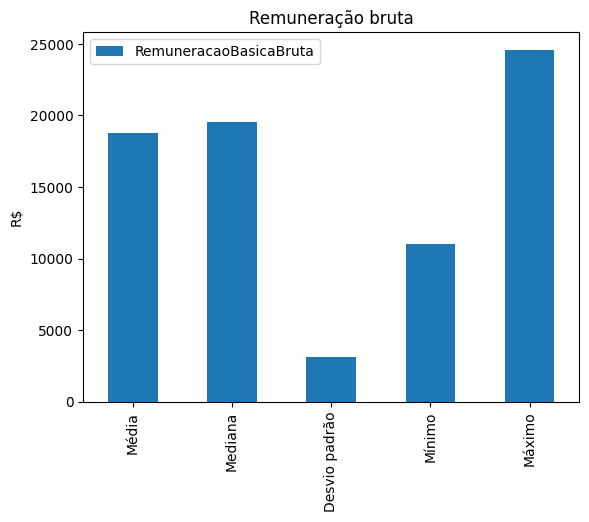

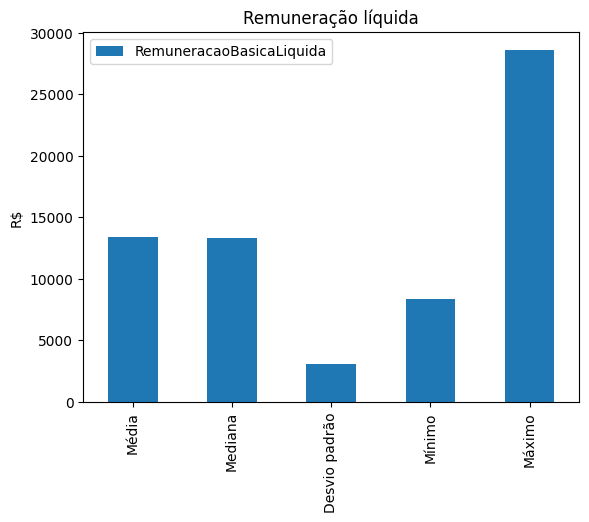

As remunerações dos docentes foram salvas no arquivo "docentes.csv".


In [37]:
# ler o arquivo docentes.csv
docentes = pd.read_csv('docentes.csv')

# converta a coluna RemuneracaoBasicaBruta para float
docentes['RemuneracaoBasicaBruta'] = docentes['RemuneracaoBasicaBruta'].str.replace('.', '')
docentes['RemuneracaoBasicaBruta'] = docentes['RemuneracaoBasicaBruta'].str.replace(',', '.').astype(float)

# converta a coluna RemuneracaoBasicaLiquida para float
docentes['RemuneracaoBasicaLiquida'] = docentes['RemuneracaoBasicaLiquida'].str.replace('.', '')
docentes['RemuneracaoBasicaLiquida'] = docentes['RemuneracaoBasicaLiquida'].str.replace(',', '.').astype(float)

# calcular a remuneração bruta e líquida média
remuneracaoBrutaMedia = docentes['RemuneracaoBasicaBruta'].mean()
remuneracaoLiquidaMedia = docentes['RemuneracaoBasicaLiquida'].mean()

# calcular a remuneração bruta e líquida mediana
remuneracaoBrutaMediana = docentes['RemuneracaoBasicaBruta'].median()
remuneracaoLiquidaMediana = docentes['RemuneracaoBasicaLiquida'].median()

# calcular a remuneração bruta e líquida desvio padrão
remuneracaoBrutaDesvioPadrao = docentes['RemuneracaoBasicaBruta'].std()
remuneracaoLiquidaDesvioPadrao = docentes['RemuneracaoBasicaLiquida'].std()

# calcular a remuneração bruta e líquida mínimo
remuneracaoBrutaMinimo = docentes['RemuneracaoBasicaBruta'].min()
remuneracaoLiquidaMinimo = docentes['RemuneracaoBasicaLiquida'].min()

# calcular a remuneração bruta e líquida máximo
remuneracaoBrutaMaximo = docentes['RemuneracaoBasicaBruta'].max()
remuneracaoLiquidaMaximo = docentes['RemuneracaoBasicaLiquida'].max()

# faça um gráfico de barras com a remuneração bruta e líquida média, mediana, desvio padrão, mínimo e máximo
# criar um dataframe com a remuneração bruta e líquida média, mediana, desvio padrão, mínimo e máximo
remuneracaoBruta = pd.DataFrame({'RemuneracaoBasicaBruta': [remuneracaoBrutaMedia, remuneracaoBrutaMediana, remuneracaoBrutaDesvioPadrao, remuneracaoBrutaMinimo, remuneracaoBrutaMaximo]}, index=['Média', 'Mediana', 'Desvio padrão', 'Mínimo', 'Máximo'])
remuneracaoLiquida = pd.DataFrame({'RemuneracaoBasicaLiquida': [remuneracaoLiquidaMedia, remuneracaoLiquidaMediana, remuneracaoLiquidaDesvioPadrao, remuneracaoLiquidaMinimo, remuneracaoLiquidaMaximo]}, index=['Média', 'Mediana', 'Desvio padrão', 'Mínimo', 'Máximo'])

# criar um gráfico de barras com a remuneração bruta e líquida média, mediana, desvio padrão, mínimo e máximo
remuneracaoBruta.plot.bar()
plt.title('Remuneração bruta')
plt.ylabel('R$')
plt.show()

remuneracaoLiquida.plot.bar()
plt.title('Remuneração líquida')
plt.ylabel('R$')
plt.show()

# salvar o arquivo docentes.csv
docentes.to_csv('docentes.csv', index=False)

print(f'As remunerações dos docentes foram salvas no arquivo "docentes.csv".')

##### Comparando a quantidade de professoras e professores no departamento

In [38]:
# ler o arquivo de docentes['Nome'][i]s femininos
nomesFemininos = pd.read_csv('ibge-fem-10000.csv')

# criar uma lista com os 1000 primeiros nomes femininos
nomesFemininos = nomesFemininos['nome'][:1000].tolist()

# leia o arquivo docentes.csv
docentes = pd.read_csv('docentes.csv')

# crie uma coluna com o gênero do docente
docentes['Genero'] = ''

# para cada nome do arquivo docentes.csv, verifique se o nome está na lista de nomes femininos
# se estiver, o gênero é feminino, senão é masculino
for i in range(len(docentes['Nome'])):
    # removendo os acentos
    nome = docentes['Nome'][i].replace('á', 'a')
    nome = nome.replace('à', 'a')
    nome = nome.replace('ã', 'a')
    nome = nome.replace('â', 'a')
    nome = nome.replace('é', 'e')
    nome = nome.replace('ê', 'e')
    nome = nome.replace('í', 'i')
    nome = nome.replace('ó', 'o')
    nome = nome.replace('ô', 'o')
    nome = nome.replace('õ', 'o')
    nome = nome.replace('ú', 'u')
    nome = nome.replace('ü', 'u')
    nome = nome.replace('ç', 'c')

    nome = nome.upper().split(' ')[0].strip()
    
    # aparentemente, marilde não é um nome tão comum
    # se deixar a lista completa dos nomes femininos, há muitos nomes masculinos no meio
    # por esse motivo, o nome marilde foi adicionado manualmente
    if nome == 'MARILDE' or nome in nomesFemininos:
        docentes['Genero'][i] = 'Feminino'
    else:
        docentes['Genero'][i] = 'Masculino'

# salve o arquivo docentes.csv
docentes.to_csv('docentes.csv', index=False)

print(f'Os gêneros dos docentes foram salvos no arquivo "docentes.csv".')

Os gêneros dos docentes foram salvos no arquivo "docentes.csv".


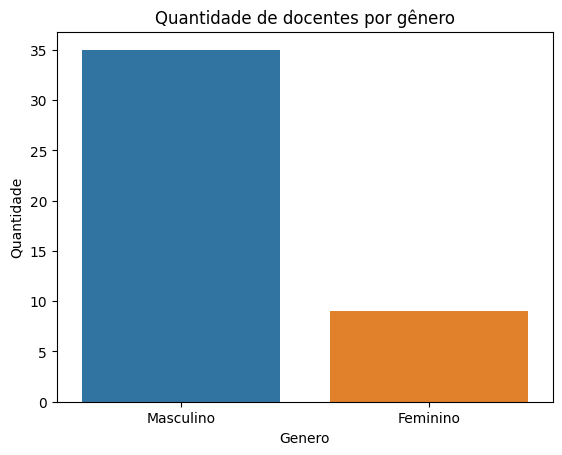

In [36]:
# leia o arquivo docentes.csv
docentes = pd.read_csv('docentes.csv')

# faça um gráfico de barras com a quantidade de docentes por gênero
sns.countplot(x='Genero', data=docentes)
plt.title('Quantidade de docentes por gênero')
plt.ylabel('Quantidade')
plt.show()

##### Comparando a diferença salarial entre gêneros

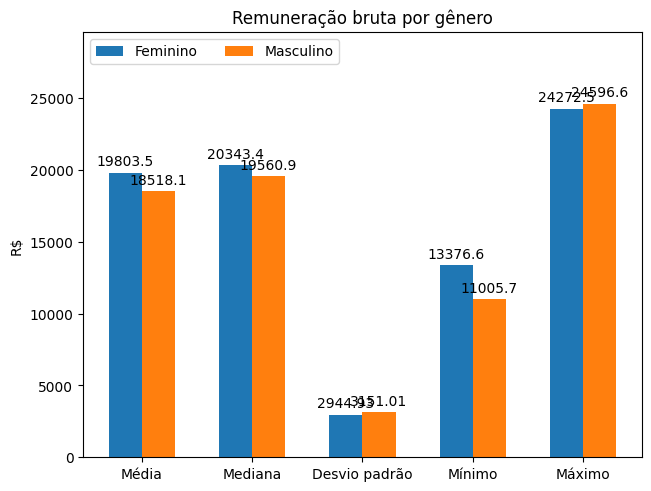

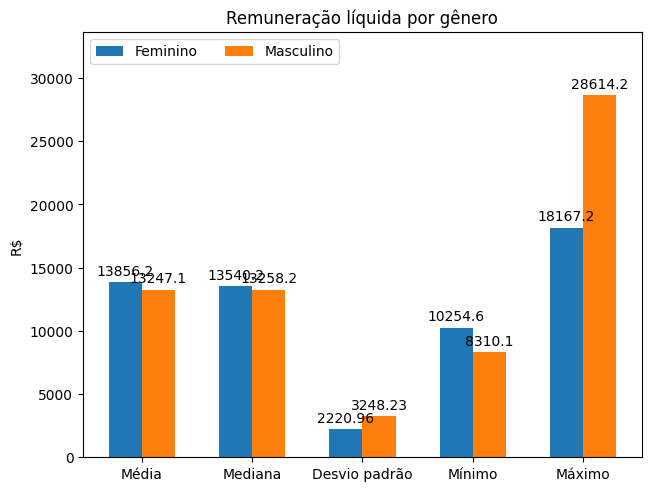

In [69]:
# criar um dataframe com a remuneração bruta e líquida média, mediana, desvio padrão, mínimo e máximo por gênero
remuneracaoBruta = docentes.groupby('Genero')['RemuneracaoBasicaBruta'].agg(['mean', 'median', 'std', 'min', 'max'])
remuneracaoLiquida = docentes.groupby('Genero')['RemuneracaoBasicaLiquida'].agg(['mean', 'median', 'std', 'min', 'max'])

labels = ('Média', 'Mediana', 'Desvio padrão', 'Mínimo', 'Máximo')

valoresPorGenero = {
    'Feminino': [remuneracaoBruta['mean'][0], remuneracaoBruta['median'][0], remuneracaoBruta['std'][0], remuneracaoBruta['min'][0], remuneracaoBruta['max'][0]],
    'Masculino': [remuneracaoBruta['mean'][1], remuneracaoBruta['median'][1], remuneracaoBruta['std'][1], remuneracaoBruta['min'][1], remuneracaoBruta['max'][1]]
}

# criar um gráfico de barras com a remuneração bruta média, mediana, desvio padrão, mínimo e máximo por gênero
x = np.arange(len(labels))
width = 0.3
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in valoresPorGenero.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, align='center')
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_ylabel('R$')
ax.set_title('Remuneração bruta por gênero')
ax.set_xticks(x + width / 2)
ax.set_xticklabels(labels)
ax.legend(loc='upper left', ncols=2)
ax.set_ylim(0, remuneracaoBruta['max'][1] + 5000)
plt.show()

# criar um gráfico de barras com a remuneração líquida média, mediana, desvio padrão, mínimo e máximo por gênero
valoresPorGenero = {
    'Feminino': [remuneracaoLiquida['mean'][0], remuneracaoLiquida['median'][0], remuneracaoLiquida['std'][0], remuneracaoLiquida['min'][0], remuneracaoLiquida['max'][0]],
    'Masculino': [remuneracaoLiquida['mean'][1], remuneracaoLiquida['median'][1], remuneracaoLiquida['std'][1], remuneracaoLiquida['min'][1], remuneracaoLiquida['max'][1]]
}

x = np.arange(len(labels))
width = 0.3
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in valoresPorGenero.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, align='center')
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_ylabel('R$')
ax.set_title('Remuneração líquida por gênero')
ax.set_xticks(x + width / 2)
ax.set_xticklabels(labels)
ax.legend(loc='upper left', ncols=2)
ax.set_ylim(0, remuneracaoLiquida['max'][1] + 5000)
plt.show()